In [3]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'pfs_connectivity_ratio_210101'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData



# ap = argparse.ArgumentParser()
# ap.add_argument("--max_dist", type=int, default=150)
# ap.add_argument("--threshold", type=int, default=6)
# = ap.parse_args()
max_dist = 1000
threshold = 6



from weight_database import WeightDatabase
weightdb = WeightDatabase()

# weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_201224_setup01_syndb_threshold_10_coalesced.gz')
weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
    max_dist=max_dist
    )


postsyns = weightdb.get_presyn_ids()



mpd = MyPlotData()

n = 0
for postsyn in postsyns:
    n_total = len(weightdb.get_total_connections(postsyn)) 
    n_connected = len(weightdb.get_connections(postsyn)) 
    if n_total >= threshold:
        ratio = n_connected/n_total*100
        # print(postsyn)
        # print(f'n_total: {n_total}', end=', ')
        # print(f'n_connected: {n_connected}', end=', ')
        # print(f'ratio: {ratio}', end=', ')
        # print()
        n += 1
        mpd.add_data_point(
            ratio=ratio,
            )
print(f'Num samples: {n}')


Num samples: 4474


Height: 4, Aspect: 1.33


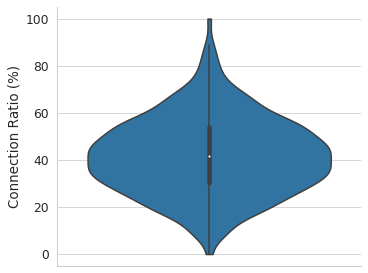

In [4]:


importlib.reload(my_plot); my_plot.my_cat_bar_plot(
    mpd,
    # x="num_syns_per_connection",
    y="ratio",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    # y_lims=[.25, .75],
    context='paper',
    kind='violin',
    # font_scale=1.5,
#     add_swarm=True,
    inner='box',
    height=4,
    bw=.25,
    cut=0,
    y_axis_label='Connection Ratio (%)',
    # x_axis_label='# of synapses per connection',
    save_filename=f'{script_n}_max_dist_{max_dist}_threshold_{threshold}.svg',
    show=True,
    )
